In [1]:
using Plots
using EmpiricalBayes
using CSV
using DataFrames
using Distributions
using LaTeXStrings
using JLD2
using Nullables
using Random: seed!
using StatsBase
using KernelDensity

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
pgfplots()

Plots.PGFPlotsBackend()

In [3]:
xs = Float64.(collect(-3:0.25:3));

In [4]:
@load "cached_results/chetty_post_mean_Dec18.jld2"

1-element Array{Symbol,1}:
 :post_mean_cis

In [9]:
left_ci_post_mean = [t.ci_left for t in post_mean_cis]
right_ci_post_mean =  [t.ci_right for t in post_mean_cis]
point_est_post_mean  = [t.calibrated_target for t in post_mean_cis];

-1.8396215782690255

In [26]:
pilot_post_mean = [t.est_target for t in post_mean_cis];

In [6]:
mycols =["#424395" "#EB549A" "#5EC2DA" "#EBC915" "#018AC4"  "#550133"]

1×6 Array{String,2}:
 "#424395"  "#EB549A"  "#5EC2DA"  "#EBC915"  "#018AC4"  "#550133"

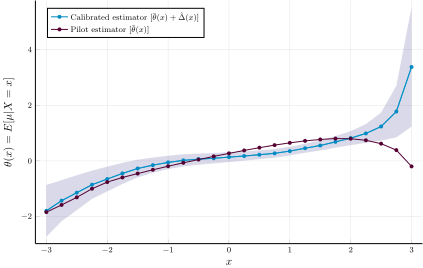

In [47]:

plot(xs, [point_est_post_mean point_est_post_mean],
          fillrange=[left_ci_post_mean right_ci_post_mean],
          fillalpha=0.2, fillcolor=mycols[1],
          label="", 
          color=[mycols[3] mycols[3]],
          line=([:solid :solid]),
          ylabel=L"\theta(x) = E[\mu | X=x]",
          xlabel=L"x")
plot!(xs, [point_est_post_mean pilot_post_mean],
          marker=:circle, color=[mycols[5] mycols[6]],
          markerstrokealpha =0, legend=:topleft, 
          label=[L"Calibrated estimator $[\bar{\theta}(x) + \hat{\Delta}(x)]$" L"Pilot estimator $[\bar{\theta}(x)]$"])


In [32]:
last_ci = post_mean_cis[25];

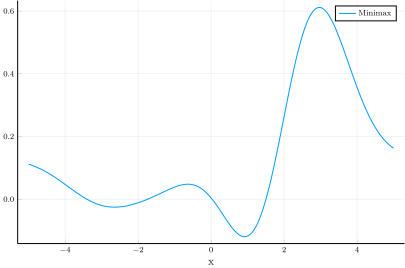

In [36]:
plot(last_ci.est_denom_linear)

In [34]:
last_ci.est_num, last_ci.est_denom

(-0.0037809724297188695, 0.019135209546042583)